In [ ]:
#SOME DATA ANALYZE

In [50]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [51]:


import numpy as np
import scipy as sp
import pandas as pd
import tkinter as tk
import csv
import graphviz
import io
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.neighbors import NearestNeighbors

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO
from PIL import Image
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
from sklearn.tree import export_graphviz



import matplotlib.pyplot as plt


In [52]:
#read the csv into a dataframe
df = pd.read_csv('googleplaystore.csv')


#Preprocess data
df2 = df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'])
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df2['Rating'] = imp.fit_transform(df2[['Rating']])

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+']


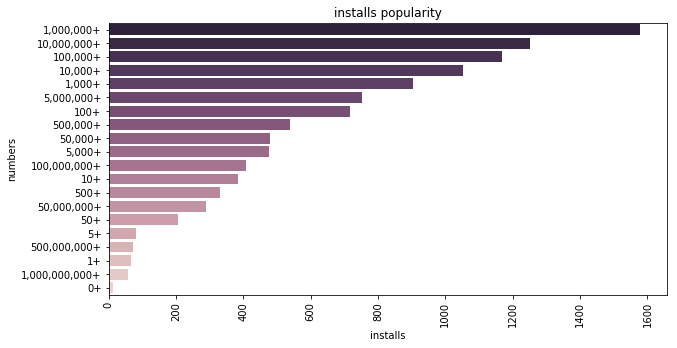

In [53]:
print(df2['Installs'].unique())
install_list=list(df2['Installs'].unique())
name_count = Counter(df2['Installs'])         
most_common_names = name_count.most_common(20) 
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(10,5))
sns.barplot(x=y, y=x,palette = sns.cubehelix_palette(len(x),reverse=True))
plt.xticks(rotation= 90)
plt.xlabel('installs')
plt.ylabel('numbers')
plt.title('installs popularity')
plt.show()

['Free' 'Paid']


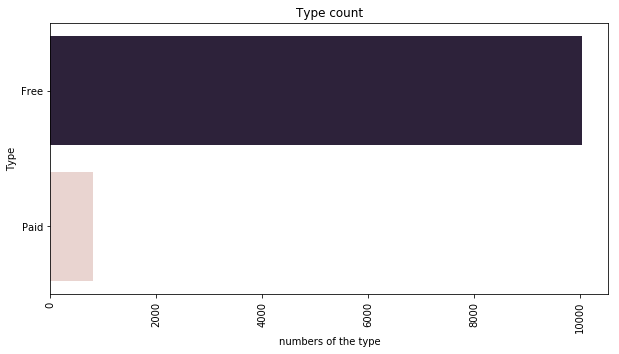

In [54]:
print(df2['Type'].unique())
install_list=list(df2['Type'].unique())
name_count = Counter(df2['Type'])         
most_common_names = name_count.most_common() 
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(10,5))
sns.barplot(x=y, y=x,palette = sns.cubehelix_palette(len(x),reverse=True))
plt.xticks(rotation= 90)
plt.xlabel('numbers of the type')
plt.ylabel('Type')
plt.title('Type count')
plt.show()

[4.1        3.9        4.7        4.5        4.3        4.4
 3.8        4.2        4.6        4.         4.19183761 4.8
 4.9        3.6        3.7        3.2        3.3        3.4
 3.5        3.1        5.         2.6        3.         1.9
 2.5        2.8        2.7        1.         2.9        2.3
 2.2        1.7        2.         1.8        2.4        1.6
 2.1        1.4        1.5        1.2       ]


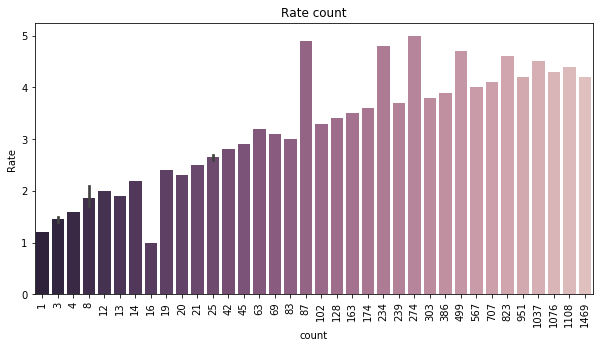

In [55]:
print(df2['Rating'].unique())
install_list=list(df2['Rating'].unique())
name_count = Counter(df2['Rating'])         
most_common_names = name_count.most_common(40) 
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(10,5))
sns.barplot(x=y, y=x,palette = sns.cubehelix_palette(len(x),reverse=True))
plt.xticks(rotation= 90)
plt.xlabel('count')
plt.ylabel('Rate')
plt.title('Rate count')
plt.show()

['4.0.3 and up' '4.2 and up' '4.4 and up' '2.3 and up' '3.0 and up'
 '4.1 and up' '4.0 and up' '2.3.3 and up' 'Varies with device'
 '2.2 and up' '5.0 and up' '6.0 and up' '1.6 and up' '1.5 and up'
 '2.1 and up' '7.0 and up' '5.1 and up' '4.3 and up' '4.0.3 - 7.1.1'
 '2.0 and up' '3.2 and up' '4.4W and up' '7.1 and up' '7.0 - 7.1.1'
 '8.0 and up' '5.0 - 8.0' '3.1 and up' '2.0.1 and up' '4.1 - 7.1.1'
 '5.0 - 6.0' '1.0 and up' '2.2 - 7.1.1' '5.0 - 7.1.1']


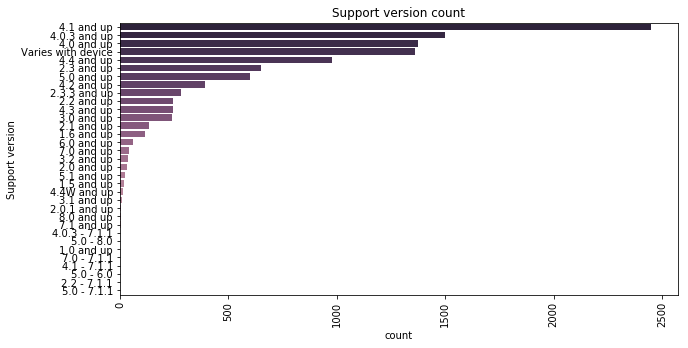

In [56]:
print(df2['Android Ver'].unique())
install_list=list(df2['Android Ver'].unique())
name_count = Counter(df2['Android Ver'])         
most_common_names = name_count.most_common() 
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(10,5))
sns.barplot(x=y, y=x,palette = sns.cubehelix_palette(len(x),reverse=True))
plt.xticks(rotation= 90)
plt.xlabel('count')
plt.ylabel('Support version')
plt.title('Support version count')
plt.show()

In [57]:


#Remove '+' in the 'Installs' collumn of data frame
df2['Installs'] = df2['Installs'].map(lambda x: x.rstrip('+'))
#Replace ',' in the 'Installs' collumn of data frame with empty string
df2['Installs'] = df2['Installs'].str.replace(',', '')
#Convert string to int for 'Installs' number
df2['Installs'] = df2['Installs'].astype("int")

#Create new 'Popularity' column
df2['Popularity'] = ''
df2.to_csv('googleplaystore_Update1.csv', index=False)



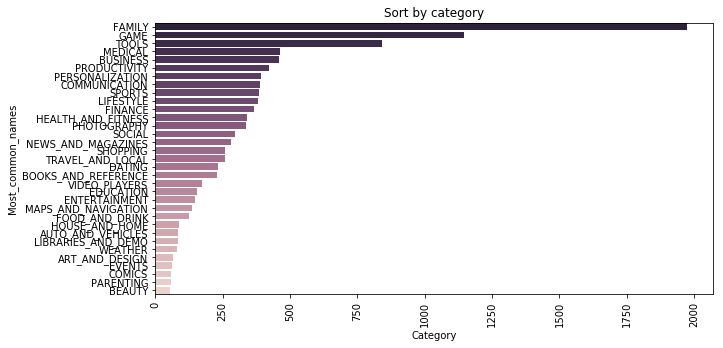

In [58]:
cate_list=list(df2['Category'].unique())
name_count = Counter(df['Category'])         
most_common_names = name_count.most_common(33) 
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(10,5))
sns.barplot(x=y, y=x,palette = sns.cubehelix_palette(len(x),reverse=True))
plt.xticks(rotation= 90)
plt.xlabel('Category')
plt.ylabel('Most_common_names')
plt.title('Sort by category')
plt.show()

In [59]:
#Start to use the new update data frame for next tasks
df3 = pd.read_csv('googleplaystore_Update1.csv')
row = 0
for data in df3['Installs']:
	if data < 100000:
		df3.loc[row,'Popularity'] = 0#Low
	elif data < 10000000:
		df3.loc[row,'Popularity'] = 1#Medium
	else:
		df3.loc[row,'Popularity'] = 2#High
	row = row+1

    
#Store to new csv file after preprocess data
df3.to_csv('googleplaystore_Update2.csv', index=False)
#print(df3['Category'].unique())
Cat_list = tuple(df3['Category'].unique())
Cont_list = tuple(df3['Content Rating'].unique())
Vers_list = tuple(df3['Android Ver'].unique())
Genres_list = tuple(df3['Genres'].unique())
i =0;
c = tuple(range(33))
df3['Category'] = df3['Category'].map({Cat_list[0] : c[0],Cat_list[11] : c[11],Cat_list[22] : c[22],
									   Cat_list[1] : c[1],Cat_list[12] : c[12],Cat_list[23] : c[23],
									   Cat_list[2] : c[2],Cat_list[13] : c[13],Cat_list[24] : c[24],
									   Cat_list[3] : c[3],Cat_list[14] : c[14],Cat_list[25] : c[25],
									   Cat_list[4] : c[4],Cat_list[15] : c[15],Cat_list[26] : c[26],
									   Cat_list[5] : c[5],Cat_list[16] : c[16],Cat_list[27] : c[27],
									   Cat_list[6] : c[6],Cat_list[17] : c[17],Cat_list[28] : c[28],
									   Cat_list[7] : c[7],Cat_list[18] : c[18],Cat_list[29] : c[29],
									   Cat_list[8] : c[8],Cat_list[19] : c[19],Cat_list[30] : c[30],
									   Cat_list[9] : c[9],Cat_list[20] : c[20],Cat_list[31] : c[31],
									   Cat_list[10] : c[10],Cat_list[21] : c[21],Cat_list[32] : c[32]})
df3['Type'] = df3['Type'].map({'Free': 0, 'Paid': 1})
df3['Content Rating'] = df3['Content Rating'].map({Cont_list[0]: c[0], Cont_list[2]: c[2], Cont_list[4]: c[4],
												   Cont_list[1]: c[1], Cont_list[3]: c[3], Cont_list[5]: c[5],})
df3['Android Ver'] = df3['Android Ver'].map({Vers_list[0] : c[0],Vers_list[11] : c[11],Vers_list[22] : c[22],
										     Vers_list[1] : c[1],Vers_list[12] : c[12],Vers_list[23] : c[23],
										     Vers_list[2] : c[2],Vers_list[13] : c[13],Vers_list[24] : c[24],
										     Vers_list[3] : c[3],Vers_list[14] : c[14],Vers_list[25] : c[25],
										     Vers_list[4] : c[4],Vers_list[15] : c[15],Vers_list[26] : c[26],
										     Vers_list[5] : c[5],Vers_list[16] : c[16],Vers_list[27] : c[27],
										     Vers_list[6] : c[6],Vers_list[17] : c[17],Vers_list[28] : c[28],
										     Vers_list[7] : c[7],Vers_list[18] : c[18],Vers_list[29] : c[29],
										     Vers_list[8] : c[8],Vers_list[19] : c[19],Vers_list[30] : c[30],
										     Vers_list[9] : c[9],Vers_list[20] : c[20],Vers_list[31] : c[31],
										     Vers_list[10] : c[10],Vers_list[21] : c[21],Vers_list[32] : c[32]})	

i = 0
#df4 = df3['Genres'].map({Genres_list[i] : tuple(range(119))[i]})
#df5 = df4.dropna()
while i < 119:
	df4 = df3['Genres'].map({Genres_list[i] : tuple(range(119))[i]})
	df4 = df4.dropna()
	if i == 0:
		df5 = df4.dropna()
	if i > 0 :
		df5 = df5.append(df4)
	i += 1
df3['Genres'] = df5										 
												   
df3.to_csv('googleplaystore_Update3.csv', index=False)



[0. 1. 2.]


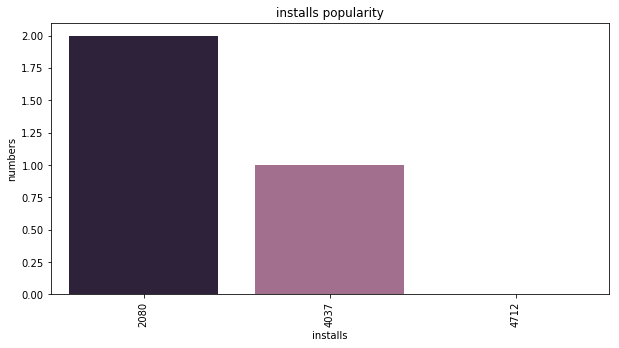

In [60]:
print(df3['Popularity'].unique())
install_list=list(df3['Popularity'].unique())
name_count = Counter(df3['Popularity'])         
most_common_names = name_count.most_common(3) 
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(10,5))
sns.barplot(x=y, y=x,palette = sns.cubehelix_palette(len(x),reverse=True))
plt.xticks(rotation= 90)
plt.xlabel('installs')
plt.ylabel('numbers')
plt.title('installs popularity')
plt.show()

In [61]:
df4 = pd.read_csv('googleplaystore_Update3.csv')
columns = ['Last Updated','Current Ver','App', 'Reviews', 'Size', 'Price']
df4 = df4.drop(columns, axis=1)  
df4.to_csv('googleplaystore_Update4.csv', index=False)
#print(df3['Content Rating'].describe())
#print (df4['Installs'].describe())
print(df4['Category'].unique())
print(df4['Rating'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
[4.1        3.9        4.7        4.5        4.3        4.4
 3.8        4.2        4.6        4.         4.19183761 4.8
 4.9        3.6        3.7        3.2        3.3        3.4
 3.5        3.1        5.         2.6        3.         1.9
 2.5        2.8        2.7        1.         2.9        2.3
 2.2        1.7        2.         1.8        2.4        1.6
 2.1        1.4        1.5        1.2       ]


In [62]:
###################################################Decisionn tree analyzing
##test = 20% for analyzing purpose 
train, test = TTS(df4, test_size = 0.2)	
print("Trainning size: {}; Test size: {}".format(len(train), len(test)))
features = ['Genres','Category','Content Rating','Android Ver','Type']
x_train = train[features]
y_train = train['Popularity']
x_test = test[features]
y_test = test['Popularity']
test_array =[0] * 50
train_array = [0] * 50
for x in range(1, 50):
    c = tree.DecisionTreeClassifier(max_depth= x)#None
    #store decision tree to dt
    dt= c.fit(x_train,y_train)
    #predict test set
    y_predictions = dt.predict(x_test)
    #print accuracy of test set
    print('Class Decision Tree: depth', x)
    test_accurate = accuracy_score(y_test, y_predictions)
    print('accuracy of test set = ', test_accurate)
    y = x-1
    test_array[y] = test_accurate
    y_train_predictions = dt.predict(x_train)
    #print accuracy of train set
    train_accurate = accuracy_score(y_train, y_train_predictions)
    print('accuracy of train set = ', train_accurate)
    train_array[y] = train_accurate


Trainning size: 8663; Test size: 2166
Class Decision Tree: depth 1
accuracy of test set =  0.4265927977839335
accuracy of train set =  0.43726191850398244
Class Decision Tree: depth 2
accuracy of test set =  0.45244690674053556
accuracy of train set =  0.46692831582592637
Class Decision Tree: depth 3
accuracy of test set =  0.5083102493074793
accuracy of train set =  0.5000577167263073
Class Decision Tree: depth 4
accuracy of test set =  0.5161588180978762
accuracy of train set =  0.5380353226365001
Class Decision Tree: depth 5
accuracy of test set =  0.5341643582640813
accuracy of train set =  0.5641232829273923
Class Decision Tree: depth 6
accuracy of test set =  0.5521698984302862
accuracy of train set =  0.5786678979568279
Class Decision Tree: depth 7
accuracy of test set =  0.5734072022160664
accuracy of train set =  0.5969063834699296
Class Decision Tree: depth 8
accuracy of test set =  0.5817174515235457
accuracy of train set =  0.6117972988572088
Class Decision Tree: depth 9
ac

In [63]:
DtreeGr = pd.DataFrame()
DtreeGr['test']  = list(test_array)
DtreeGr['train'] = list(train_array) #pd.Series(train_array)
print(DtreeGr)
DtreeGr.to_csv('DtreeGr.csv', index=False)

        test     train
0   0.426593  0.437262
1   0.452447  0.466928
2   0.508310  0.500058
3   0.516159  0.538035
4   0.534164  0.564123
5   0.552170  0.578668
6   0.573407  0.596906
7   0.581717  0.611797
8   0.589104  0.628189
9   0.581256  0.641464
10  0.580794  0.655316
11  0.573407  0.665936
12  0.572484  0.675747
13  0.587719  0.682096
14  0.589566  0.685906
15  0.582641  0.690638
16  0.588643  0.692370
17  0.590951  0.694217
18  0.587719  0.694909
19  0.590489  0.695371
20  0.590489  0.695371
21  0.590028  0.695371
22  0.589566  0.695371
23  0.589104  0.695371
24  0.589104  0.695371
25  0.589566  0.695371
26  0.590951  0.695371
27  0.590951  0.695371
28  0.589566  0.695371
29  0.590028  0.695371
30  0.590489  0.695371
31  0.590028  0.695371
32  0.589104  0.695371
33  0.590028  0.695371
34  0.590951  0.695371
35  0.591413  0.695371
36  0.589104  0.695371
37  0.590489  0.695371
38  0.590951  0.695371
39  0.589566  0.695371
40  0.590951  0.695371
41  0.589104  0.695371
42  0.59002

In [64]:
###################################################Decisionn tree
##test = 20% for analyzing purpose
train, test = TTS(df4, test_size = 0.2)	
print("Trainning size: {}; Test size: {}".format(len(train), len(test)))

c = tree.DecisionTreeClassifier(max_depth= 5)#None
features = ['Genres','Category','Content Rating','Android Ver','Type']
x_train = train[features]
y_train = train['Popularity']
x_test = test[features]
y_test = test['Popularity']
#store decision tree to dt
dt= c.fit(x_train,y_train)
#predict test set
y_predictions = dt.predict(x_test)
#print accuracy of test set
print('Class Decision Tree:')
print('accuracy of test set = ', accuracy_score(y_test, y_predictions))

#
y_train_predictions = dt.predict(x_train)
#print accuracy of train set
print('accuracy of train set = ', accuracy_score(y_train, y_train_predictions))
#display tree
#def show_tree(tree, features, path):
#	f = io.StringIO()
	
#print (y_test)
#print(abc)



#export tree
dot_data = StringIO()
tree.export_graphviz(c,
                     out_file = dot_data,
                     feature_names = features,
                     class_names= 'Popularity', 
                     filled = True,
                     rounded = True,
                     impurity = False
                    )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_jpg('ggplay.jpg')  #save graph as image
print('File saved as a JPG.')

img = Image.open('ggplay.jpg') # Open the saved image Deo co tu mo dcs


Trainning size: 8663; Test size: 2166
Class Decision Tree:
accuracy of test set =  0.556786703601108
accuracy of train set =  0.5548886067182269
File saved as a JPG.


In [65]:
###############################################################################KNN
from sklearn.neighbors import KNeighborsClassifier

train, test = TTS(df4, test_size = 0.2)
#classifier = KNeighborsClassifier(n_neighbors=5)  

x_train = train[features]
y_train = train['Popularity']

x_test = test[features]
y_test = test['Popularity']
  


test_array =[0] * 50
train_array = [0] * 50
for x in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=x)
    classifier.fit(x_train, y_train)
    print('KNN classifier: ')
    y_predictions = classifier.predict(x_test)
    y_train_predictions = classifier.predict(x_train)
    y = x-1
    test_accurate = accuracy_score(y_test, y_predictions)
    test_array[y] = test_accurate
    print('KNN accuracy of test set = ', test_accurate)
    train_accurate = accuracy_score(y_train, y_train_predictions)
    train_array[y] = train_accurate
    print('KNN accuracy of train set = ', train_accurate)
    #X_train, X_test, y_train, y_test = train_test_split('Features','Popularity', stratify='Popularity', random_state=66) 


KNN classifier: 
KNN accuracy of test set =  0.538781163434903
KNN accuracy of train set =  0.6195313401823849
KNN classifier: 
KNN accuracy of test set =  0.5535549399815328
KNN accuracy of train set =  0.6153757358882604
KNN classifier: 
KNN accuracy of test set =  0.5521698984302862
KNN accuracy of train set =  0.6288814498441648
KNN classifier: 
KNN accuracy of test set =  0.5637119113573407
KNN accuracy of train set =  0.6296894840124668
KNN classifier: 
KNN accuracy of test set =  0.5512465373961218
KNN accuracy of train set =  0.6212628419716034
KNN classifier: 
KNN accuracy of test set =  0.5646352723915051
KNN accuracy of train set =  0.6296894840124668
KNN classifier: 
KNN accuracy of test set =  0.5706371191135734
KNN accuracy of train set =  0.6299203509176959
KNN classifier: 
KNN accuracy of test set =  0.5678670360110804
KNN accuracy of train set =  0.6270345146023317
KNN classifier: 
KNN accuracy of test set =  0.569713758079409
KNN accuracy of train set =  0.62818884912

In [68]:
KNNGr = pd.DataFrame()
KNNGr['test']  = list(test_array)
KNNGr['train'] = list(train_array) #pd.Series(train_array)
print(KNNGr)
KNNGr.to_csv('KNNGr.csv', index=False)

        test     train
0   0.538781  0.619531
1   0.553555  0.615376
2   0.552170  0.628881
3   0.563712  0.629689
4   0.551247  0.621263
5   0.564635  0.629689
6   0.570637  0.629920
7   0.567867  0.627035
8   0.569714  0.628189
9   0.566944  0.623802
10  0.564635  0.622417
11  0.574331  0.621725
12  0.569714  0.613991
13  0.572946  0.615837
14  0.565559  0.616646
15  0.572484  0.614683
16  0.570637  0.614799
17  0.564174  0.614914
18  0.560480  0.611105
19  0.564174  0.611682
20  0.562327  0.608796
21  0.561865  0.608103
22  0.554940  0.604294
23  0.556787  0.602793
24  0.551247  0.602447
25  0.553093  0.601870
26  0.551708  0.597022
27  0.542475  0.597368
28  0.546630  0.594829
29  0.543860  0.591712
30  0.546630  0.591481
31  0.542936  0.590096
32  0.546630  0.588018
33  0.547091  0.589634
34  0.546630  0.585940
35  0.550785  0.588249
36  0.551247  0.588711
37  0.551247  0.586864
38  0.551247  0.580977
39  0.548015  0.583285
40  0.551247  0.582939
41  0.548938  0.582015
42  0.54893

In [83]:
##################################################################Random forest
from sklearn.ensemble import RandomForestClassifier


train, test = TTS(df4, test_size = 0.3)	
features = ['Genres','Category','Content Rating','Android Ver','Type']

x_train = train[features]
y_train = train['Popularity']

x_test = test[features]
y_test = test['Popularity']
test_array =[0] * 100
train_array = [0] * 100
# forest = RandomForestClassifier(n_estimators=100, random_state=0)
for x in range(1, 101):
    forest = RandomForestClassifier(n_estimators=x, random_state=0)
    forest.fit(x_train, y_train)
    y = x-1
    train_array[y] = forest.score(x_train, y_train)
    test_array[y] = forest.score(x_test, y_test)
    print('Random Forest:')
    print("Accuracy on training set: {:f}".format(forest.score(x_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

Random Forest:
Accuracy on training set: 0.661478
Accuracy on test set: 0.564
Random Forest:
Accuracy on training set: 0.675462
Accuracy on test set: 0.584
Random Forest:
Accuracy on training set: 0.680607
Accuracy on test set: 0.581
Random Forest:
Accuracy on training set: 0.682586
Accuracy on test set: 0.585
Random Forest:
Accuracy on training set: 0.688522
Accuracy on test set: 0.590
Random Forest:
Accuracy on training set: 0.689182
Accuracy on test set: 0.600
Random Forest:
Accuracy on training set: 0.691293
Accuracy on test set: 0.591
Random Forest:
Accuracy on training set: 0.692084
Accuracy on test set: 0.593
Random Forest:
Accuracy on training set: 0.693140
Accuracy on test set: 0.591
Random Forest:
Accuracy on training set: 0.694459
Accuracy on test set: 0.600
Random Forest:
Accuracy on training set: 0.694591
Accuracy on test set: 0.595
Random Forest:
Accuracy on training set: 0.694723
Accuracy on test set: 0.597
Random Forest:
Accuracy on training set: 0.695515
Accuracy on te

In [82]:
RForestGr = pd.DataFrame()
RForestGr['test']  = list(test_array)
RForestGr['train'] = list(train_array) #pd.Series(train_array)
print(RForestGr)
RForestGr.to_csv('RForestGr.csv', index=False)

        test     train
0   0.660950  0.566944
1   0.669129  0.581717
2   0.682322  0.578332
3   0.684169  0.584795
4   0.687863  0.585411
5   0.688918  0.588797
6   0.690501  0.592490
7   0.692216  0.589720
8   0.693272  0.595260
9   0.693668  0.599569
10  0.695646  0.596183
11  0.695778  0.599261
12  0.696174  0.595568
13  0.696438  0.593721
14  0.696702  0.594645
15  0.696702  0.594029
16  0.696966  0.592490
17  0.697361  0.594645
18  0.697493  0.595568
19  0.697493  0.596183
20  0.697493  0.591874
21  0.697361  0.594645
22  0.697493  0.596183
23  0.697230  0.595876
24  0.697625  0.596799
25  0.697361  0.596491
26  0.697625  0.596799
27  0.697625  0.596491
28  0.697757  0.595876
29  0.697757  0.593721
..       ...       ...
70  0.698549  0.592182
71  0.698549  0.593721
72  0.698549  0.591567
73  0.698549  0.590028
74  0.698549  0.590951
75  0.698549  0.589104
76  0.698549  0.590643
77  0.698549  0.590643
78  0.698549  0.590643
79  0.698549  0.588797
80  0.698549  0.589412
81  0.69854

In [ ]:
##################################################################SVC 
from sklearn.ensemble import RandomForestClassifier


train, test = TTS(df4, test_size = 0.3)	
features = ['Genres','Category','Content Rating','Android Ver','Type']

x_train = train[features]
y_train = train['Popularity']

x_test = test[features]
y_test = test['Popularity']

# forest = RandomForestClassifier(n_estimators=100, random_state=0)
SVCmodel = SVC()
#forest = RandomForestClassifier(n_estimators=10, random_state=0)
SVCmodel.fit(x_train, y_train)


print('Random Forest:')
print("Accuracy on training set: {:f}".format(SVCmodel.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(SVCmodel.score(x_test, y_test)))